In [1]:
import csv
import json
import networkx as nx
edges = {}

with open('graph.csv', newline='') as graph_csv_file:
    reader = csv.DictReader(graph_csv_file)
    for row in reader:
        edges[row['node']] = json.loads(row['edges_within_category'])['key']
        edges[row['node']].extend(json.loads(row['edges_outside_category'])['key'])

In [2]:
G = nx.DiGraph()

In [3]:
for source_article, target_articles in edges.items():
    for target_article in target_articles:
        G.add_edge(source_article, target_article)

In [4]:
betweenness_centrality = nx.betweenness_centrality(G)

In [5]:
centrality_values = list(betweenness_centrality.values())

In [7]:
import numpy as np
mean_centrality = np.mean(centrality_values)
median_centrality = np.median(centrality_values)
max_centrality = np.max(centrality_values)
min_centrality = np.min(centrality_values)
std_centrality = np.std(centrality_values)


print(f"Mean Centrality: {mean_centrality}")
print(f"Median Centrality: {median_centrality}")
print(f"Max Centrality: {max_centrality}")
print(f"Min Centrality: {min_centrality}")
print(f"Standard Deviation of Centrality: {std_centrality}")

Mean Centrality: 0.00014806724087547524
Median Centrality: 5.395313424728606e-06
Max Centrality: 0.053242622223059206
Min Centrality: 0.0
Standard Deviation of Centrality: 0.0010246212990612006


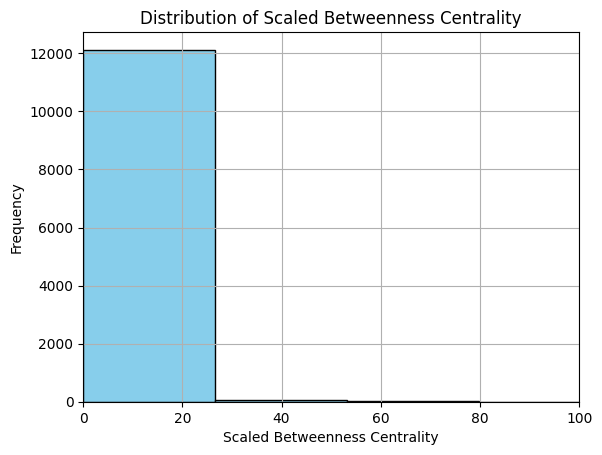

In [10]:
import matplotlib.pyplot as plt
scaling_factor = 10000  # You can adjust this scaling factor as needed
scaled_betweenness = {article: centrality * scaling_factor for article, centrality in betweenness_centrality.items()}

# Plot the distribution of scaled betweenness centrality
plt.hist(scaled_betweenness.values(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Scaled Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Distribution of Scaled Betweenness Centrality')
plt.xlim(0, 100)
plt.grid(True)
plt.show()

In [12]:
sorted_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
top_50_pairs = sorted_centrality[:50]
for i, (article, centrality) in enumerate(top_50_pairs, 1):
    print(f"{i}. Article: {article}, Betweenness Centrality: {centrality}")

1. Article: Brazil, Betweenness Centrality: 0.053242622223059206
2. Article: Peru, Betweenness Centrality: 0.04306244574809175
3. Article: Argentina, Betweenness Centrality: 0.03890668119256319
4. Article: Chile, Betweenness Centrality: 0.0341058116610783
5. Article: Timeline of Brazilian history, Betweenness Centrality: 0.025452338351372214
6. Article: Uruguay, Betweenness Centrality: 0.023142513646146196
7. Article: Lima, Betweenness Centrality: 0.018615375194354303
8. Article: Fauna of Uruguay, Betweenness Centrality: 0.014950260394181517
9. Article: List of wars involving Chile, Betweenness Centrality: 0.014247128032611548
10. Article: Colombia, Betweenness Centrality: 0.012803174008244685
11. Article: Paraguayan War, Betweenness Centrality: 0.01266849453953356
12. Article: Empire of Brazil, Betweenness Centrality: 0.012123410609236654
13. Article: Venezuela, Betweenness Centrality: 0.011591587330146688
14. Article: South America, Betweenness Centrality: 0.011242838691821135
15. Ar